In [1]:
!mlflow --version

mlflow, version 2.3.2


In [2]:
!wget -P ../tripdata "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet"
!wget -P ../tripdata "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet"
!wget -P ../tripdata "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-03.parquet"

--2023-06-17 06:03:47--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-01.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.226.4.174, 13.226.4.101, 13.226.4.64, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.226.4.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1254291 (1.2M) [binary/octet-stream]
Saving to: ‘./tripdata/green_tripdata_2022-01.parquet’

green_tripdata_2022 100%[===================>]   1.20M  1.21MB/s    in 1.0s    

2023-06-17 06:03:49 (1.21 MB/s) - ‘./tripdata/green_tripdata_2022-01.parquet’ saved [1254291/1254291]

--2023-06-17 06:03:49--  https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2022-02.parquet
Resolving d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)... 13.226.4.208, 13.226.4.64, 13.226.4.101, ...
Connecting to d37ci6vzurychx.cloudfront.net (d37ci6vzurychx.cloudfront.net)|13.226.4.208|:443... connected.
HTTP

In [1]:
!python preprocess_data.py --raw_data_path ../tripdata --dest_path ../output

## dv.pkl file size 150.1Kb

In [5]:
import os
os.makedirs(os.path.dirname("./mlflow"), exist_ok=True)

In [8]:
!chmod 777 ../mlflow

In [1]:
# uses mlflow.sklearn.autolog()
!python train.py

2023/06/17 07:05:25 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


## max depth parameter is 10

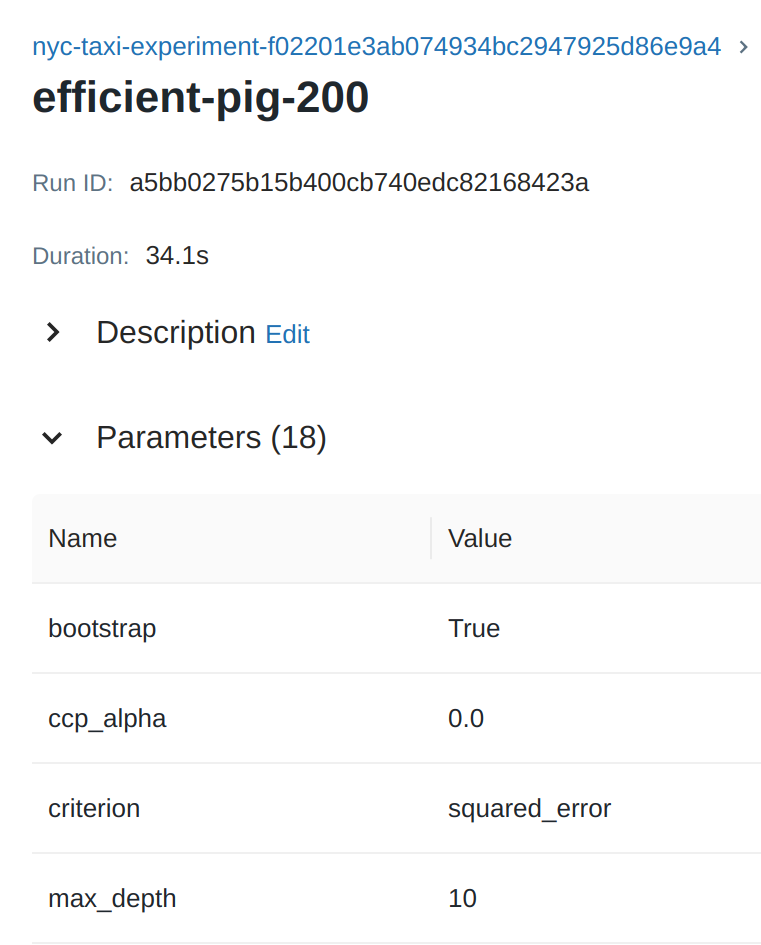

In [2]:
!python hpo.py

2023/06/17 07:05:38 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-hyperopt' does not exist. Creating a new experiment.
[I 2023-06-17 07:05:38,233] A new study created in memory with name: no-name-249880c5-7dfa-4bc9-b973-cfa740c1fc83
[I 2023-06-17 07:05:41,886] Trial 0 finished with value: 2.451379690825458 and parameters: {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 0 with value: 2.451379690825458.
[I 2023-06-17 07:05:42,256] Trial 1 finished with value: 2.4667366020368333 and parameters: {'n_estimators': 16, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.451379690825458.
[I 2023-06-17 07:05:45,524] Trial 2 finished with value: 2.449827329704216 and parameters: {'n_estimators': 34, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 2.449827329704216.
[I 2023-06-17 07:05:46,458] Trial 3 finished with value: 2.460983516558473 a

In [7]:
## minimal RMSE = 2.45

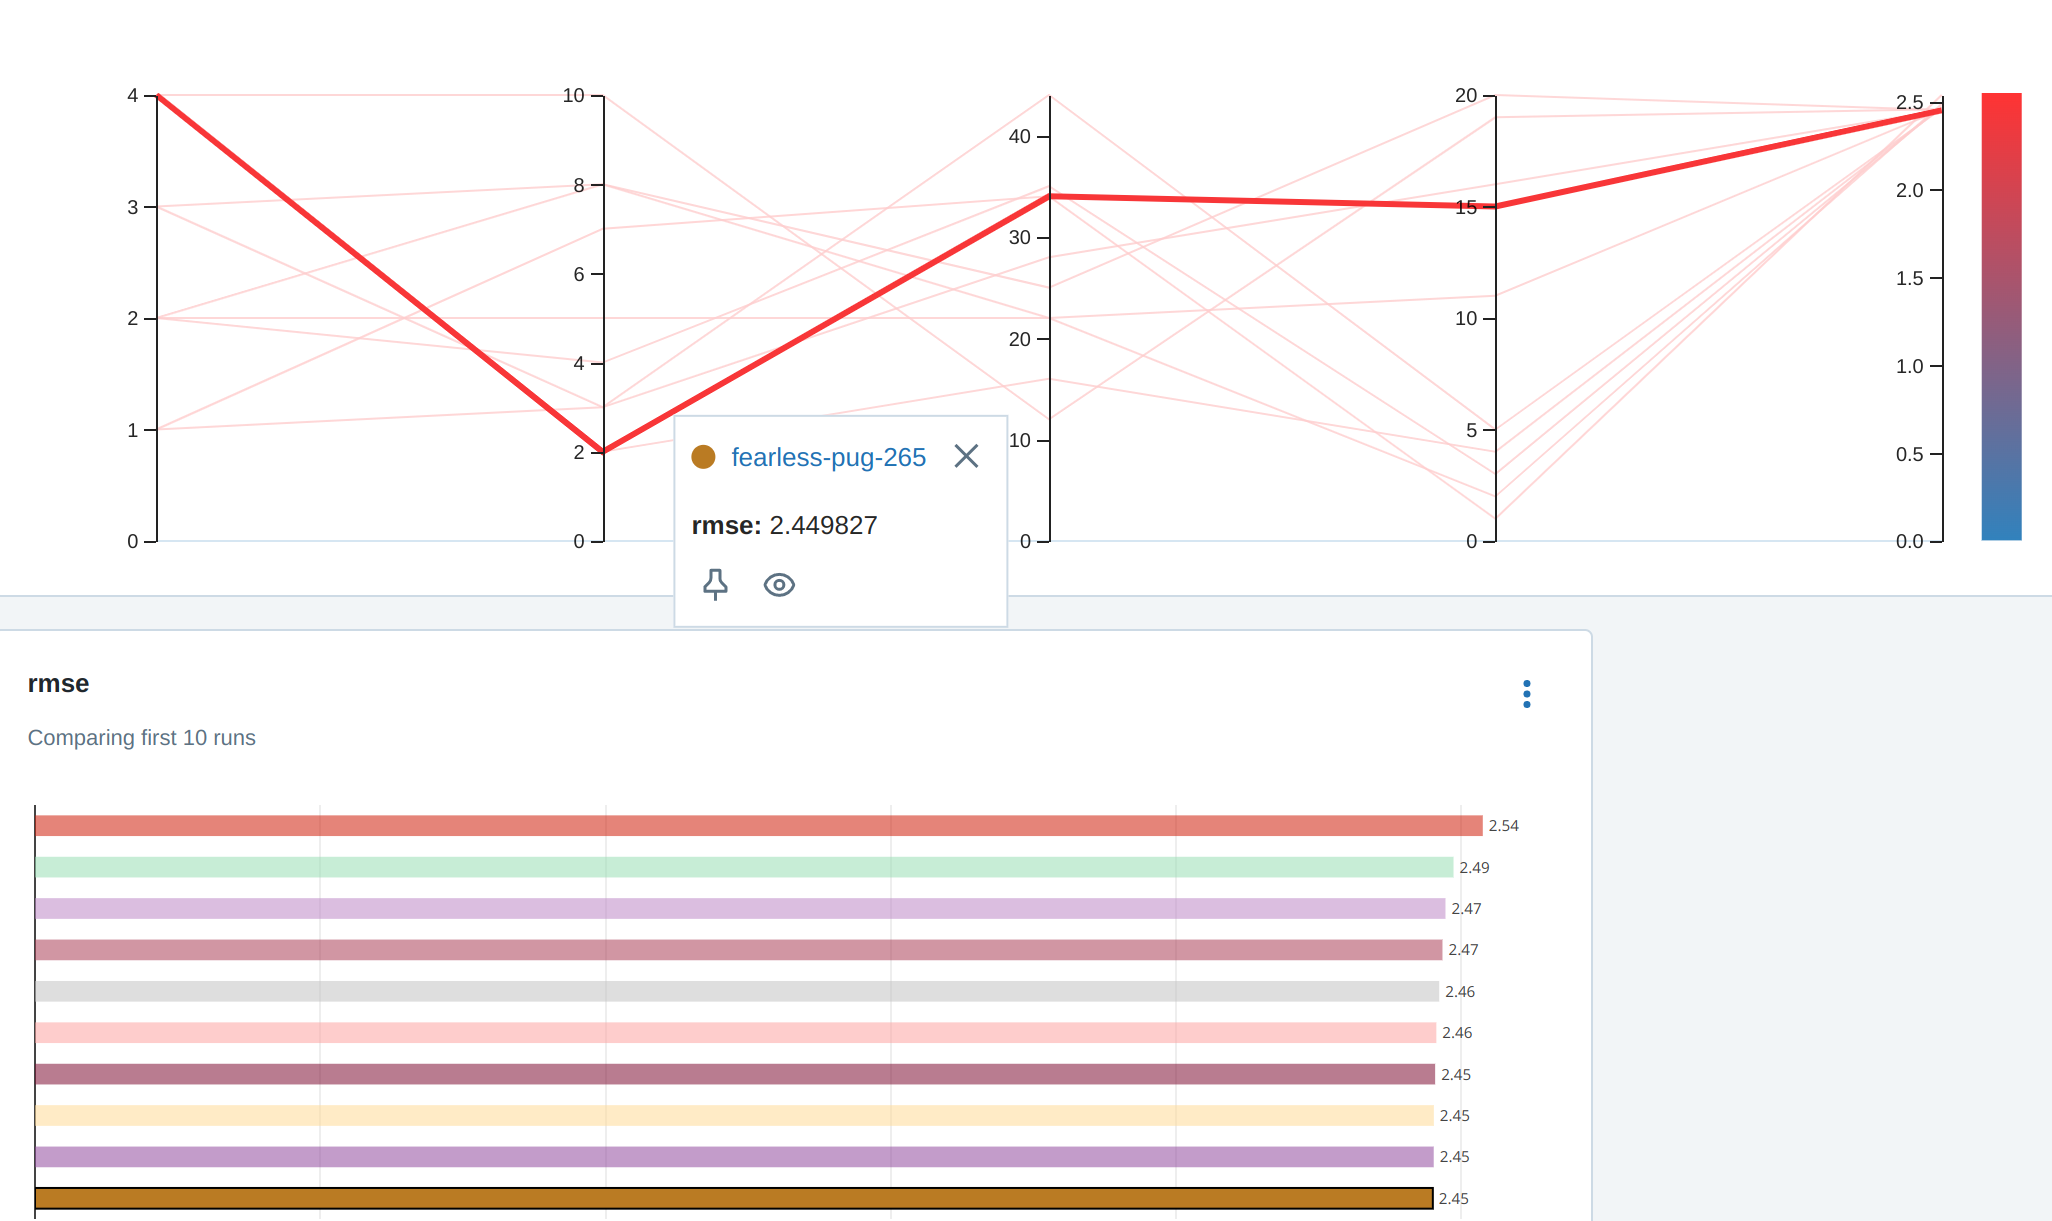

In [3]:
!python register_model.py
#3 test RMSE = 2.285

2023/06/17 07:07:59 INFO mlflow.tracking.fluent: Experiment with name 'random-forest-best-model' does not exist. Creating a new experiment.
2023/06/17 07:08:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."
Successfully registered model 'best_random_forest_model'.
2023/06/17 07:08:34 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: best_random_forest_model, version 1
Created version '1' of model 'best_random_forest_model'.


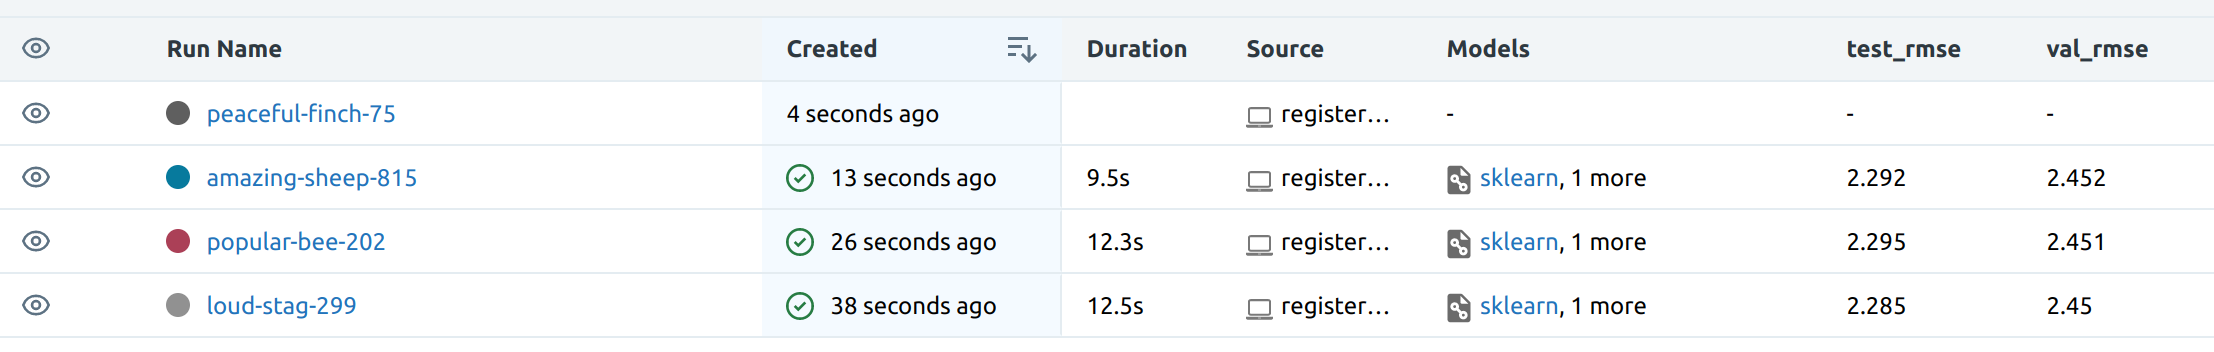

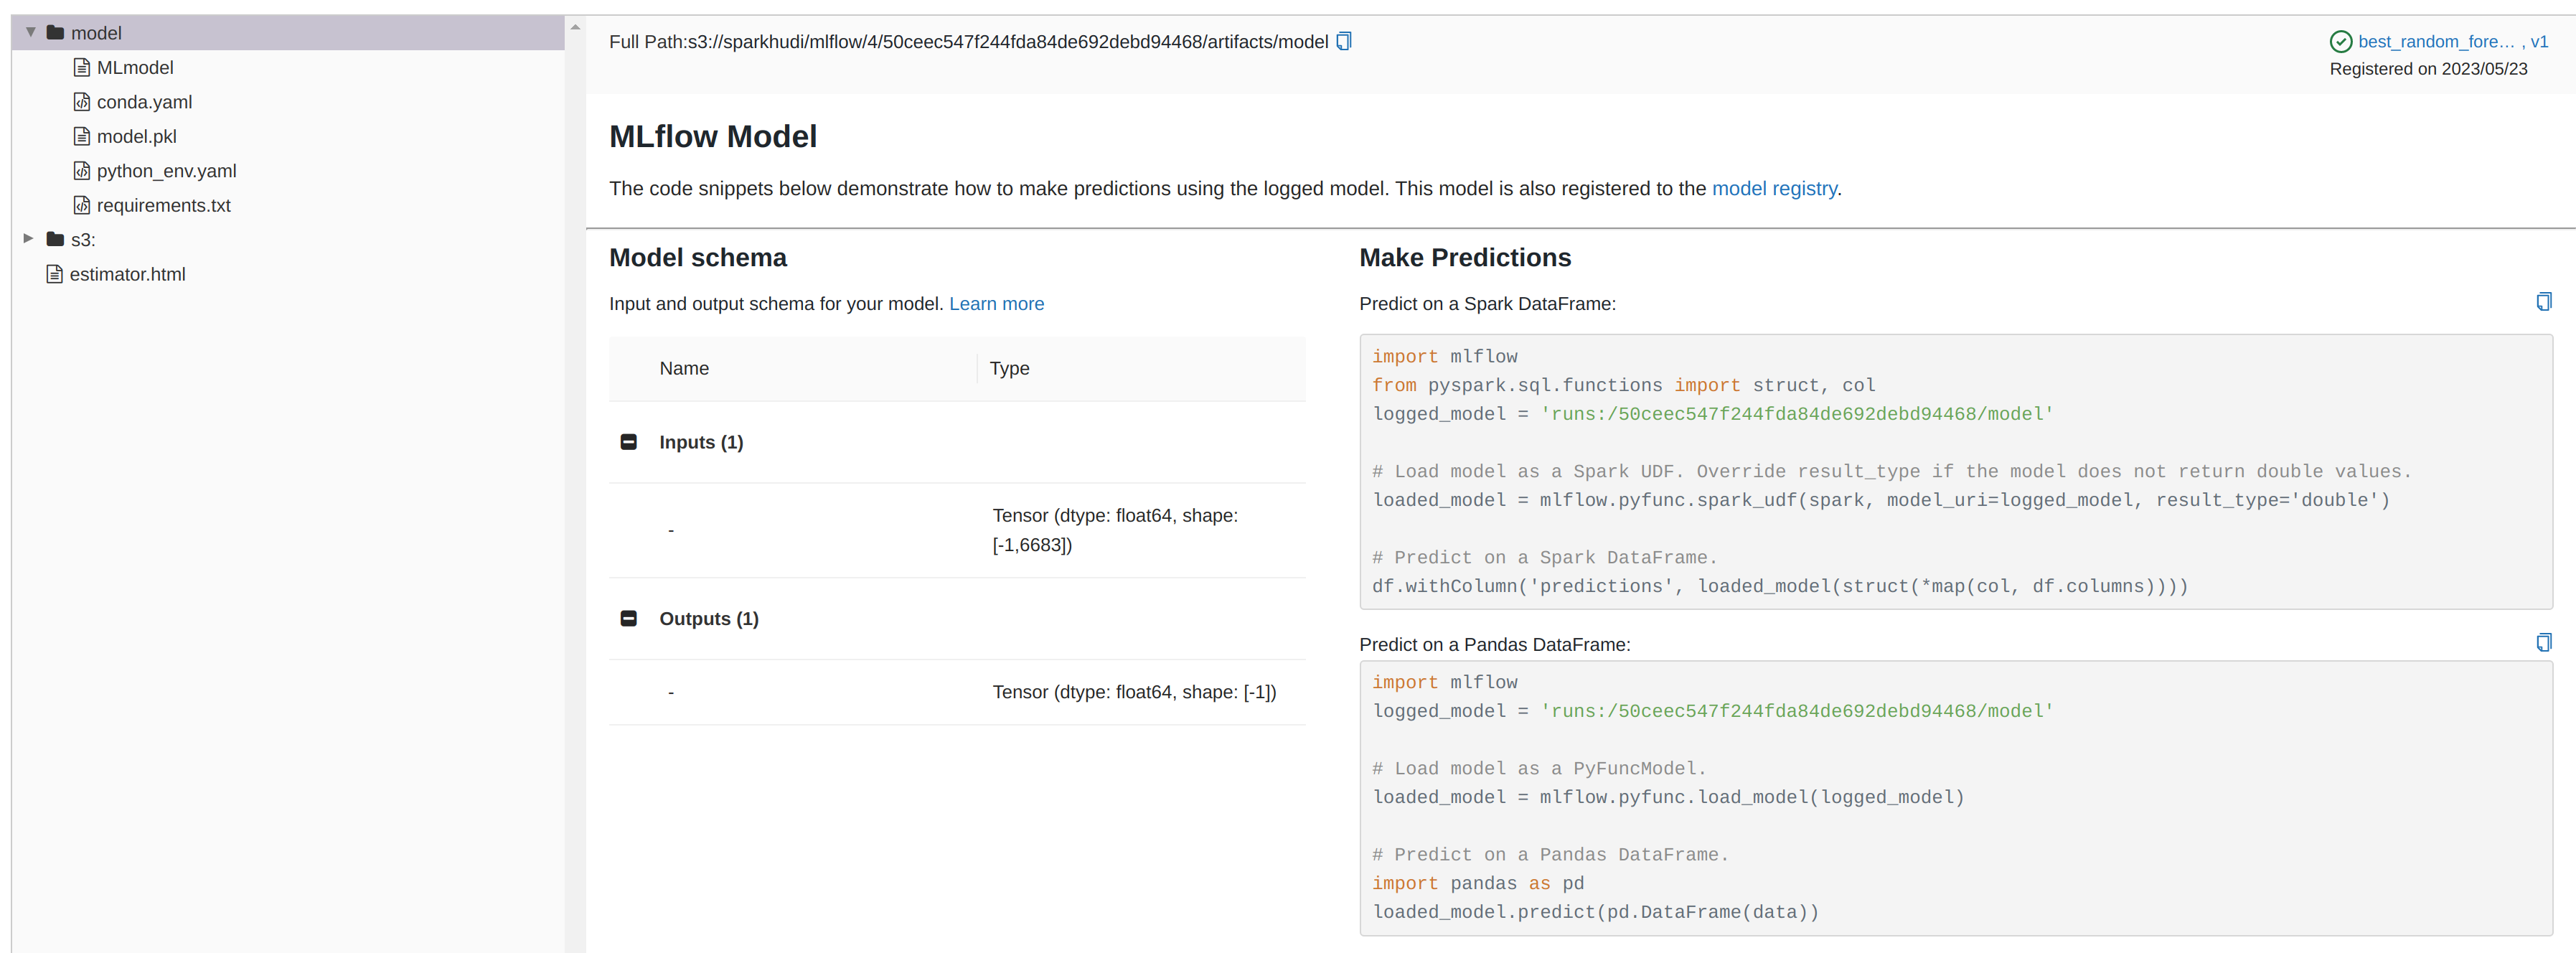

In [ ]:
#import mlflow.pyfunc
#import pandas as pd

#logged_model = 'best_random_forest_model'
#loaded_model = mlflow.pyfunc.load_model(logged_model)

#data = pd.DataFrame({
#    'feature1': [value1, value2, value3, ...],
#    'feature2': [value1, value2, value3, ...],
#    'feature3': [value1, value2, value3, ...],
#    ...
#})

## Assuming `data` is your input data in the form of a Pandas DataFrame
#predictions = loaded_model.predict(pd.DataFrame(data))